In [1]:
from libpysat import HCube
from libpysat.examples import get_path

%pylab inline

/home/jlaura/anaconda3/envs/libpysat/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


## Basic M3 I/O

In [9]:
m = HCube.from_m3(get_path('M3_4030seg_L2_aristcrater.tif'))

## Visualize one of the bands by index

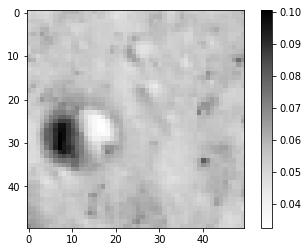

In [3]:
imshow(m[0], cmap='Greys')
colorbar()

## Get the available wavelengths

In [4]:
m.wavelengths

Float64Index([ 540.840027,   580.76001,  620.690002,  660.609985,  700.539978,
                730.47998,  750.440002,  770.400024,  790.369995,  810.330017,
               830.289978,      850.25,  870.210022,  890.169983,  910.140015,
               930.099976,  950.059998,   970.02002,   989.97998, 1009.950012,
              1029.910034, 1049.869995, 1069.829956, 1089.790039,  1109.76001,
              1129.719971, 1149.680054, 1169.640015, 1189.599976, 1209.569946,
              1229.530029,  1249.48999, 1269.449951, 1289.410034, 1309.380005,
              1329.339966, 1349.300049,  1369.26001, 1389.219971, 1409.189941,
              1429.150024, 1449.109985, 1469.069946, 1489.030029,  1508.98999,
              1528.959961, 1548.920044, 1578.859985, 1618.790039, 1658.709961,
              1698.630005, 1738.560059,  1778.47998, 1818.400024, 1858.329956,
                  1898.25, 1938.180054, 1978.099976,  2018.02002, 2057.949951,
              2097.870117, 2137.800049, 2177.719971,

## Visualize by wavelength with tolerances enabled

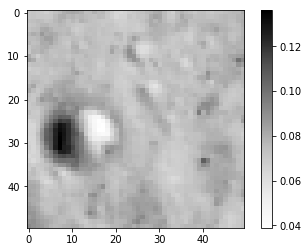

In [5]:
imshow(m.get[750], cmap='Greys')
colorbar()

In [20]:
from libpysat.derived.m3 import pipe, development, new, supplemental

## What are the available derived products for M3.pipe?

In [24]:
available = [i for i in dir(pipe) if not i.startswith('__')]
print(available)

['bd1900', 'bd2300', 'bd620', 'bdi1000', 'bdi2000', 'bdi_generic', 'calc_bdi_band', 'generic_func', 'get_band_numbers', 'h2o1', 'iralbedo', 'mafic_abs', 'np', 'olindex', 'omh', 'oneum_min', 'oneum_slope', 'pf', 'reflectance1', 'reflectance2', 'reflectance3', 'reflectance4', 'thermal_ratio', 'thermal_slope', 'twoum_ratio', 'twoum_slope', 'uvvis', 'visnir', 'visslope', 'visuv']


### Band Depth @ 620

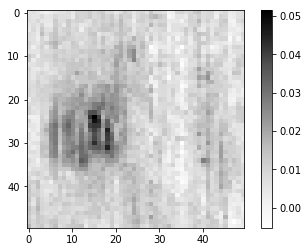

In [31]:
wv = m.wavelengths.values
imshow(pipe.bd1900(m, wv), cmap='Greys')
colorbar()

### H20 1st Algorithm

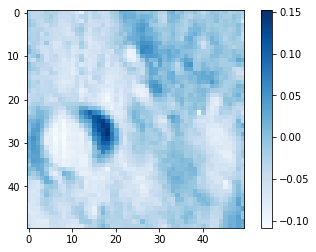

In [34]:
wv = m.wavelengths.values
imshow(pipe.h2o1(m, wv), cmap='Blues')
colorbar()

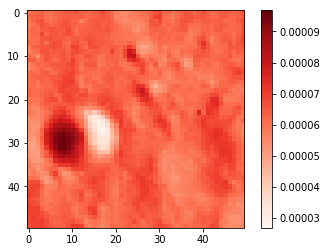

In [35]:
wv = m.wavelengths.values
imshow(pipe.twoum_slope(m, wv), cmap='Reds')
colorbar()